In [3]:
import pandas as pd

In [4]:
df34_old = pd.read_csv('to_analyze34.csv')

In [5]:
# Define the features to keep
features_to_keep = ['year', 'duration_ms', 'loudness', 'liveness', 'tempo', 'label']

# Drop all features except the ones to keep
df34_clean = df34_old[features_to_keep]

df34_clean

,year,duration_ms,loudness,liveness,tempo,label
0,2020,205090,-10.059,0.1130,109.928,1
1,2020,140526,-3.558,0.2720,90.989,1
2,2020,199054,-4.410,0.0936,114.044,1
3,2020,187541,-7.509,0.0824,133.073,1
4,2020,172325,-4.771,0.0931,144.015,1
...,...,...,...,...,...,...
170648,1945,101427,-31.113,0.0979,83.252,0
170649,1945,114900,-19.316,0.1050,99.996,0
170650,1945,170910,-9.750,0.2740,124.506,0
170651,1945,105778,-20.042,0.1070,103.594,0


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Predict the labels for the training set
y_train_pred = knn.predict(X_train)

# Predict the labels for the test set
y_test_pred = knn.predict(X_test)

# Calculate the accuracy of the model for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy of the model for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(y_test, y_test_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_test_pred)
print("Recall: ", recall)
f1 = f1_score(y_test, y_test_pred)
print("F1: ", f1)

# Calculate the overall accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Model Accuracy:", accuracy)


Training Accuracy: 0.8618024933710318
Test Accuracy: 0.7924174504116492
Precision:  0.7924351542830377
Recall:  0.7926672133067822
F1:  0.7925511668081867
Model Accuracy: 0.7924174504116492


In [12]:
#tuned Knn
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Create a KNN classifier
knn_tuned = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn_tuned, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy_tuned = accuracy_score(y_test, y_pred)
precision_tuned = precision_score(y_test, y_pred)
recall_tuned = recall_score(y_test, y_pred)
f1_tuned = f1_score(y_test, y_pred)

# Print the results for the tuned model
print("Tuned KNN Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Tuned KNN Model:
Accuracy: 0.7984530192493627
Precision: 0.7972823234385024
Recall: 0.8006911092889774
F1 Score: 0.7989830805645656


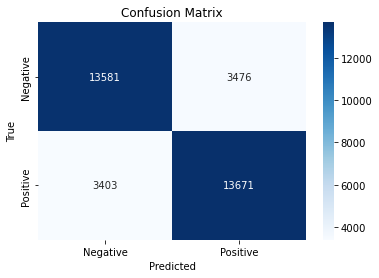

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the matrix
labels = ['Negative', 'Positive']

# Create a heatmap plot of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Set plot title
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [8]:
#LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the training set
y_train_pred = logreg.predict(X_train)

# Predict the labels for the test set
y_test_pred = logreg.predict(X_test)

# Calculate the accuracy of the model for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy of the model for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Calculate the overall accuracy of the model
overall_accuracy = accuracy_score(y, logreg.predict(X))
print("Model Accuracy:", overall_accuracy)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Training Accuracy: 0.696832744905583
Test Accuracy: 0.6965515220767045
Model Accuracy: 0.6967764996806385
Precision: 0.6806519283524286
Recall: 0.741126859552536
F1 Score: 0.7096032524884341


In [14]:
#tuned LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Define the parameter grid
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Logistic Regression classifier with the best hyperparameters
best_logreg = LogisticRegression(**best_params)

# Fit the model to the training data
best_logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_logreg.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Tuned Logistic Regression Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Tuned Logistic Regression Model:
Accuracy: 0.6965515220767045
Precision: 0.6806519283524286
Recall: 0.741126859552536
F1 Score: 0.7096032524884341


In [11]:
#decision tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8053675544226656
Precision: 0.8081172091924145
Recall: 0.8011596579594705
F1 Score: 0.804623393429605


In [16]:
#random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8433096012422724
Precision: 0.8501971090670171
Recall: 0.8336652219749326
F1 Score: 0.84185001182872


In [20]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter distribution
param_dist = {'n_estimators': randint(100, 1000),
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 10),
              'max_features': ['auto', 'sqrt', 'log2', None]}

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
best_rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



KeyboardInterrupt: 